# Dispa-SET Post-processing

This Notebook illustrates how Dispa-SET simulation results can be loaded, analysed and plotted. It uses the functions provided within the PostProcessing.py file.

Sylvain Quoilin, Joint Research Centre

November 2016

### Load DispaSET and the required libraries:

In [2]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('seaborn-colorblind')
import pickle
import sys
sys.path.append("..")
import DispaSET as ds

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('seaborn-colorblind')
#%matplotlib notebook

In [3]:
from DispaSET.postprocessing import postprocessing as post
reload(post)

<module 'DispaSET.postprocessing.postprocessing' from '../DispaSET/postprocessing/postprocessing.pyc'>

In [4]:
pd.options.display.max_rows = 60   #default 60 (None)
pd.options.display.max_columns = 60   #default 60 (None)
np.set_printoptions(threshold=1000)   #default 1000 (np.inf)

In [5]:
#Reading from pickle file and writing in dataFrame format
#inputs1 = pickle.load( open( "../Simulations/simulation_all_OneFile_Test/Inputs.p", "rb" ) )

### Define the path to the simulation environment

The folder must contain the simulatin inputs (written by the pre-processing tool) as wall as the simulation results (Results.gdx).

In [6]:
path = '../Simulations/simulation_GCC_int2'

In [7]:
#simulation_all_OneTest - MidJuly - NoTrade - Int
#simulation_all_OneTest - MidJuly - Trade - Int
#simulation_all_OneTest - MidJuly - NoTrade - Sub

### Load the inputs and the results of the simulation

This can be computationally intensive for large simulations:

In [8]:
#This function reads the simulation environment folder once it has been solved and loads
# the input variables together with the results.
inputs,results = ds.get_sim_results(path=path,cache=True)

[WARNING ] (get_sim_results): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected /Applications//GAMS26.1/sysdir as GAMS path on this computer


### Format the inputs as a dictionary of dataframes:

In [12]:
#Function that converts the dispaset data format into a dictionary of dataframes
datain = ds.ds_to_df(inputs)

### Select the time period for plotting

In [13]:
rng = pd.DatetimeIndex(start='2016-01-01 00:00:00',end='2016-12-29 23:00:00',freq='h')
rng1 = pd.DatetimeIndex(start='2016-01-01 00:00:00',end='2016-01-31 23:00:00',freq='h')
rng2 = pd.DatetimeIndex(start='2016-02-01 00:00:00',end='2016-02-29 23:00:00',freq='h')
rng3 = pd.DatetimeIndex(start='2016-03-01 00:00:00',end='2016-03-31 23:00:00',freq='h')
rng4 = pd.DatetimeIndex(start='2016-04-01 00:00:00',end='2016-04-30 23:00:00',freq='h')
rng5 = pd.DatetimeIndex(start='2016-05-01 00:00:00',end='2016-05-31 23:00:00',freq='h')
rng6 = pd.DatetimeIndex(start='2016-06-01 00:00:00',end='2016-06-30 23:00:00',freq='h')
rng7 = pd.DatetimeIndex(start='2016-07-01 00:00:00',end='2016-07-31 23:00:00',freq='h')
rng8 = pd.DatetimeIndex(start='2016-08-01 00:00:00',end='2016-08-31 23:00:00',freq='h')
rng9 = pd.DatetimeIndex(start='2016-09-01 00:00:00',end='2016-09-30 23:00:00',freq='h')
rng10 = pd.DatetimeIndex(start='2016-10-01 00:00:00',end='2016-10-31 23:00:00',freq='h')
rng11 = pd.DatetimeIndex(start='2016-11-01 00:00:00',end='2016-11-30 23:00:00',freq='h')
rng12 = pd.DatetimeIndex(start='2016-12-01 00:00:00',end='2016-12-31 23:00:00',freq='h')
rngsummer = pd.DatetimeIndex(start='2016-04-01 00:00:00',end='2016-11-30 23:00:00',freq='h')
rngwinter1 = pd.DatetimeIndex(start='2016-12-01 00:00:00',end='2016-12-31 23:00:00',freq='h')
rngwinter2 = pd.DatetimeIndex(start='2016-01-01 00:00:00',end='2016-03-31 23:00:00',freq='h')
rngwinter = rngwinter1.append(rngwinter2)

In [14]:
rng = pd.DatetimeIndex(start='2016-07-11 00:00:00',end='2016-07-17 23:00:00',freq='h')

### Plotting the detailed dispatch for each zone

In [15]:
#Nzones = len(inputs['sets']['n'])
#c = inputs['sets']['n'][np.random.randint(Nzones)]
#print('Randomly selected zone for the detailed analysis: '+ c)

In [16]:
plotdata = post.get_plot_data(inputs, results, 'SA_SOA')
demand = post.get_demand(inputs, 'SA_SOA')
post.plot_dispatch(demand, plotdata, level=None, rng=rngwinter)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/SA_SOA.png',dpi=300,tight_layout='tight_box')


<IPython.core.display.Javascript object>

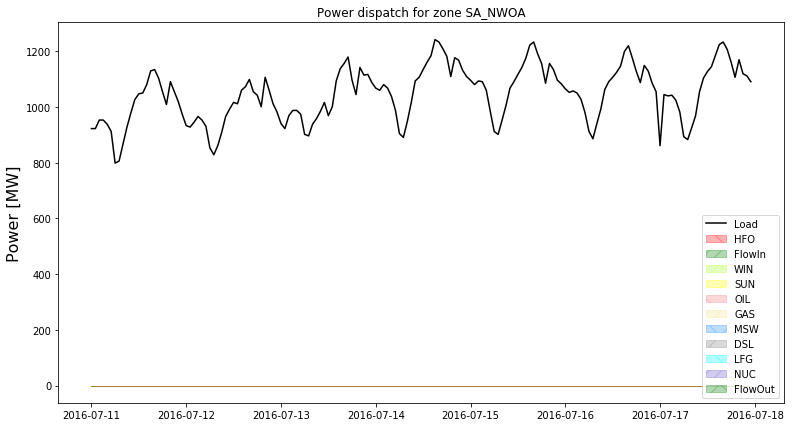

In [18]:
plotdata = post.get_plot_data(inputs, results, 'SA_NWOA')
demand = post.get_demand(inputs, 'SA_NWOA')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/SA_NWOA.png',dpi=300,tight_layout='tight_box')


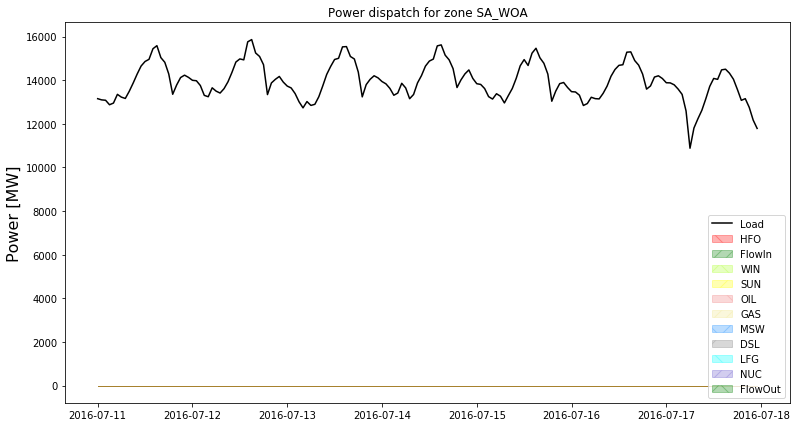

In [19]:
plotdata = post.get_plot_data(inputs, results, 'SA_WOA')
demand = post.get_demand(inputs, 'SA_WOA')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/SA_WOA.png',dpi=300,tight_layout='tight_box')


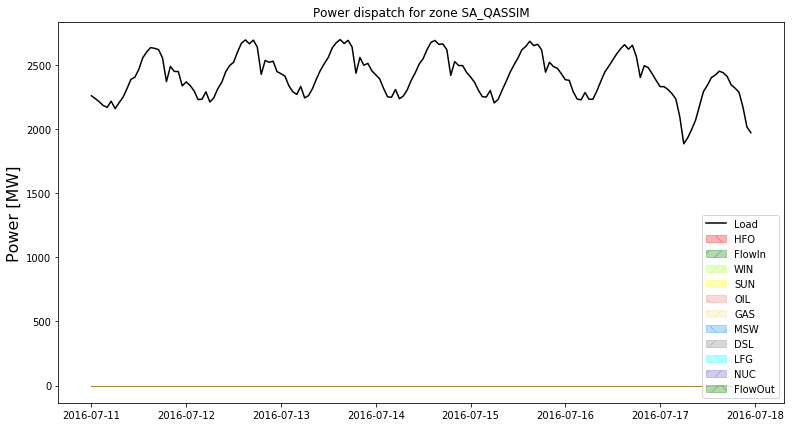

In [20]:
plotdata = post.get_plot_data(inputs, results, 'SA_QASSIM')
demand = post.get_demand(inputs, 'SA_QASSIM')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/SA_QASSIM.png',dpi=300,tight_layout='tight_box')


<IPython.core.display.Javascript object>


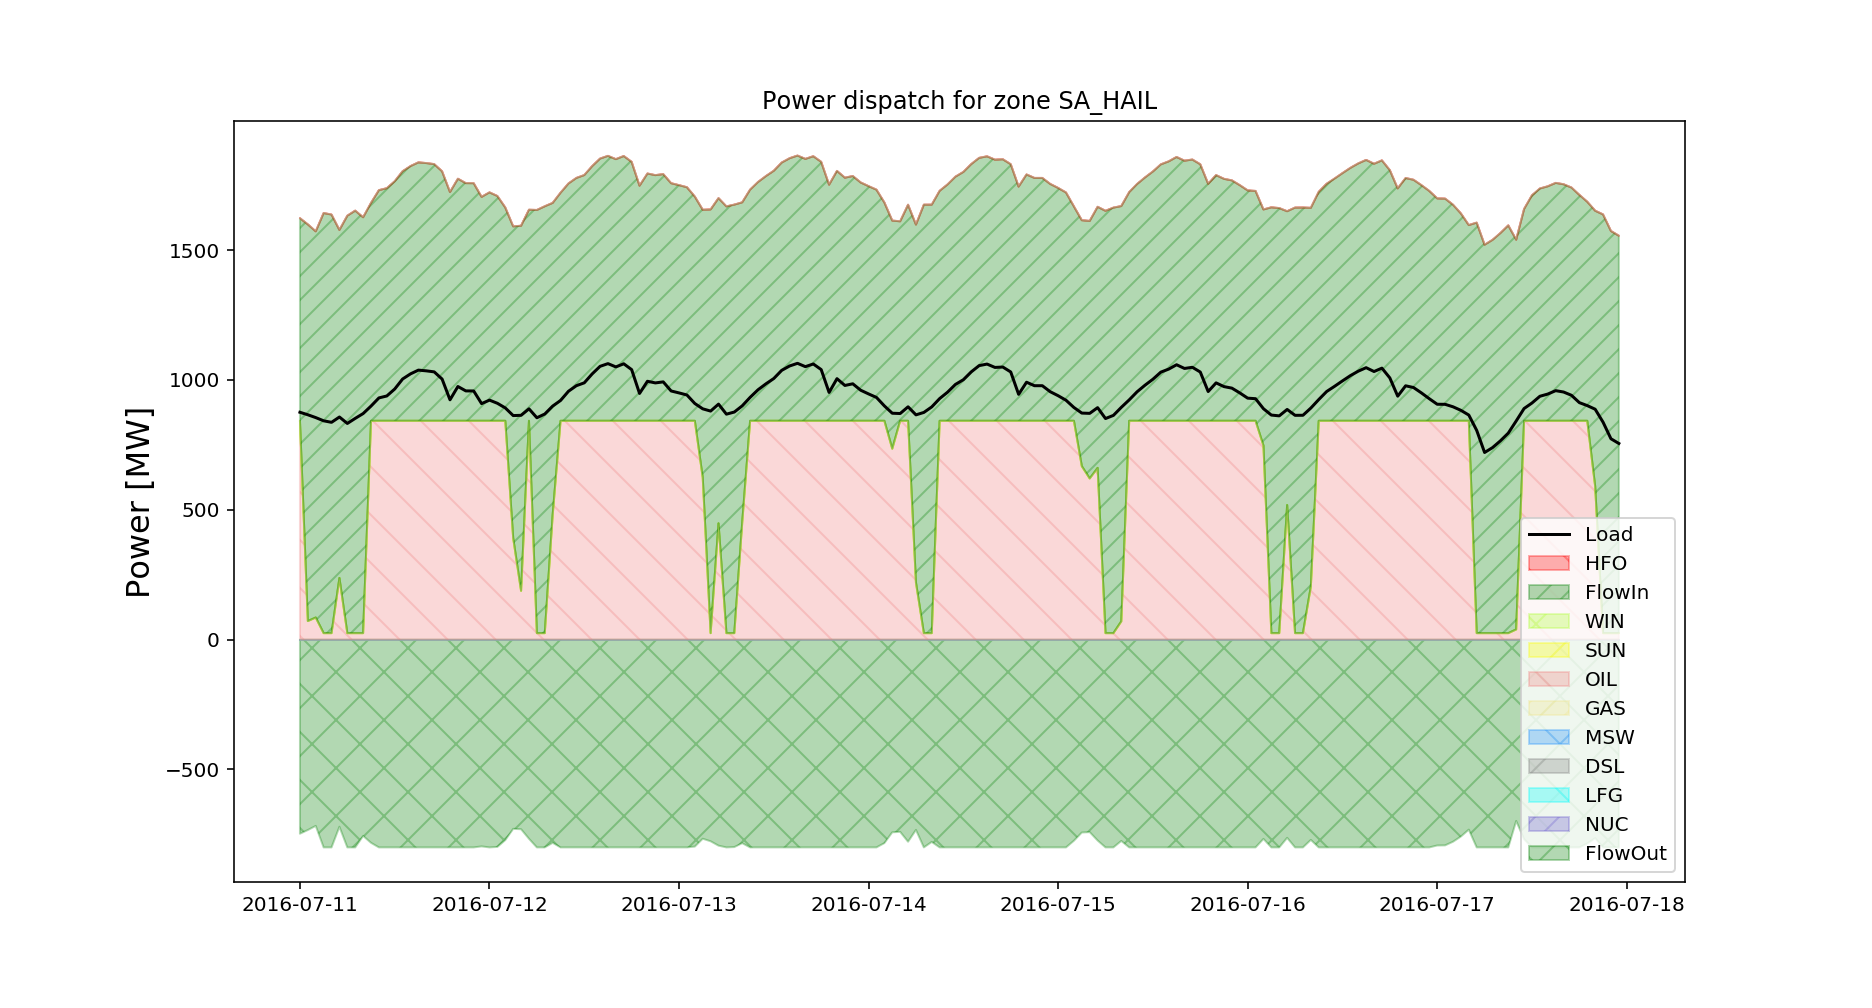

In [27]:
plotdata = post.get_plot_data(inputs, results, 'SA_HAIL')
demand = post.get_demand(inputs, 'SA_HAIL')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/SA_HAIL.png',dpi=300,tight_layout='tight_box')


<IPython.core.display.Javascript object>


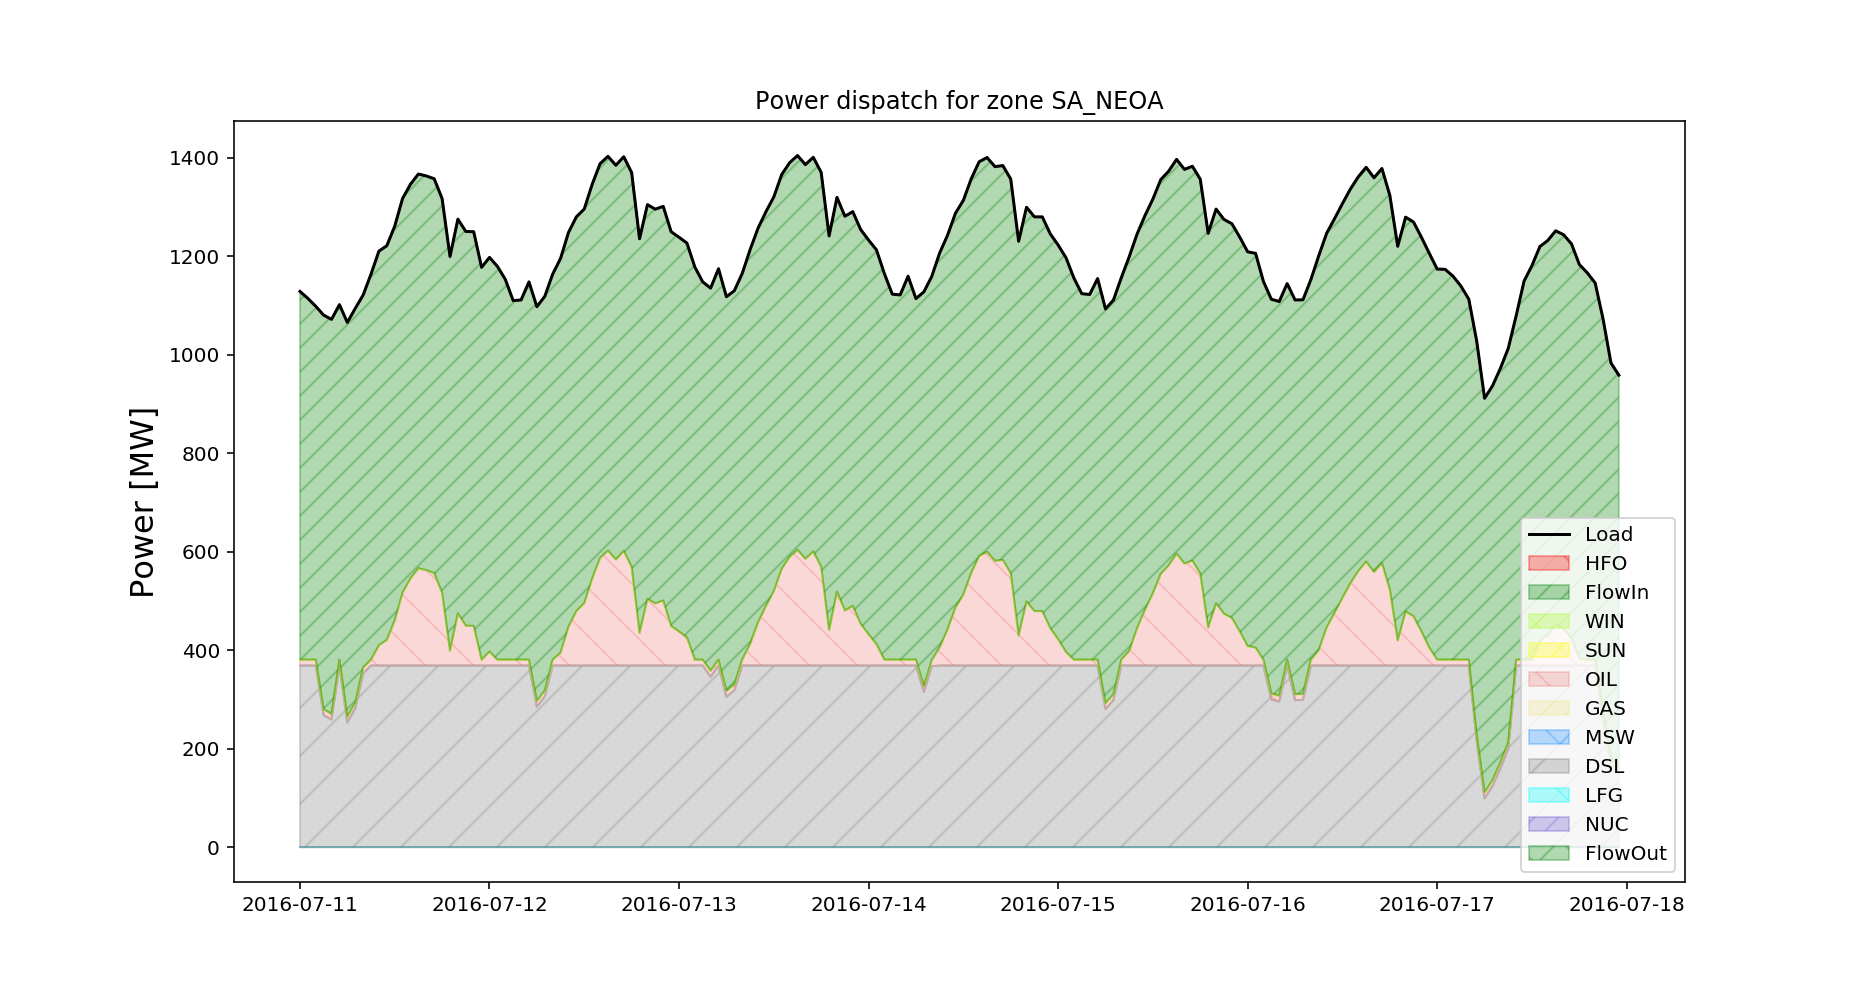

In [22]:
plotdata = post.get_plot_data(inputs, results, 'SA_NEOA')
demand = post.get_demand(inputs, 'SA_NEOA')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/SA_NEOA.png',dpi=300,tight_layout='tight_box')


<IPython.core.display.Javascript object>


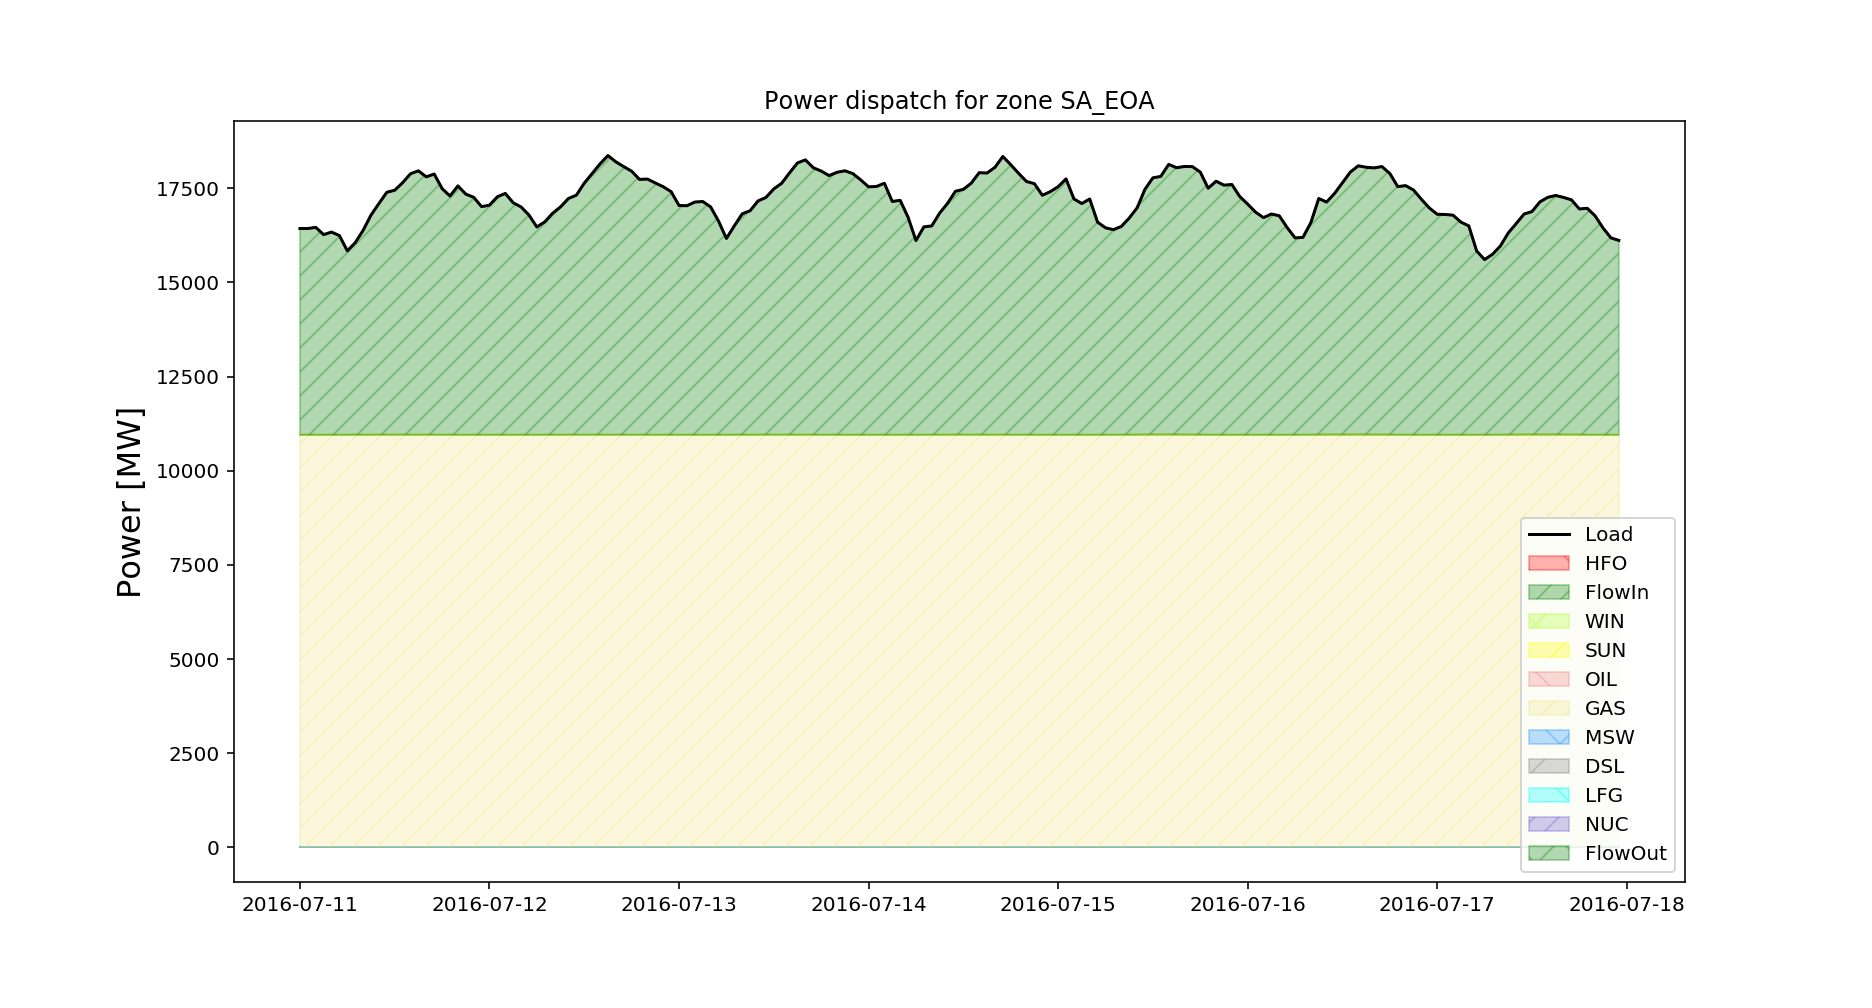

In [29]:
plotdata = post.get_plot_data(inputs, results, 'SA_EOA')
demand = post.get_demand(inputs, 'SA_EOA')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/SA_EOA.png',dpi=300,tight_layout='tight_box')


[WARNING ] (plot_dispatch): Plotting range is not properly defined, considering the first simulated week


<IPython.core.display.Javascript object>


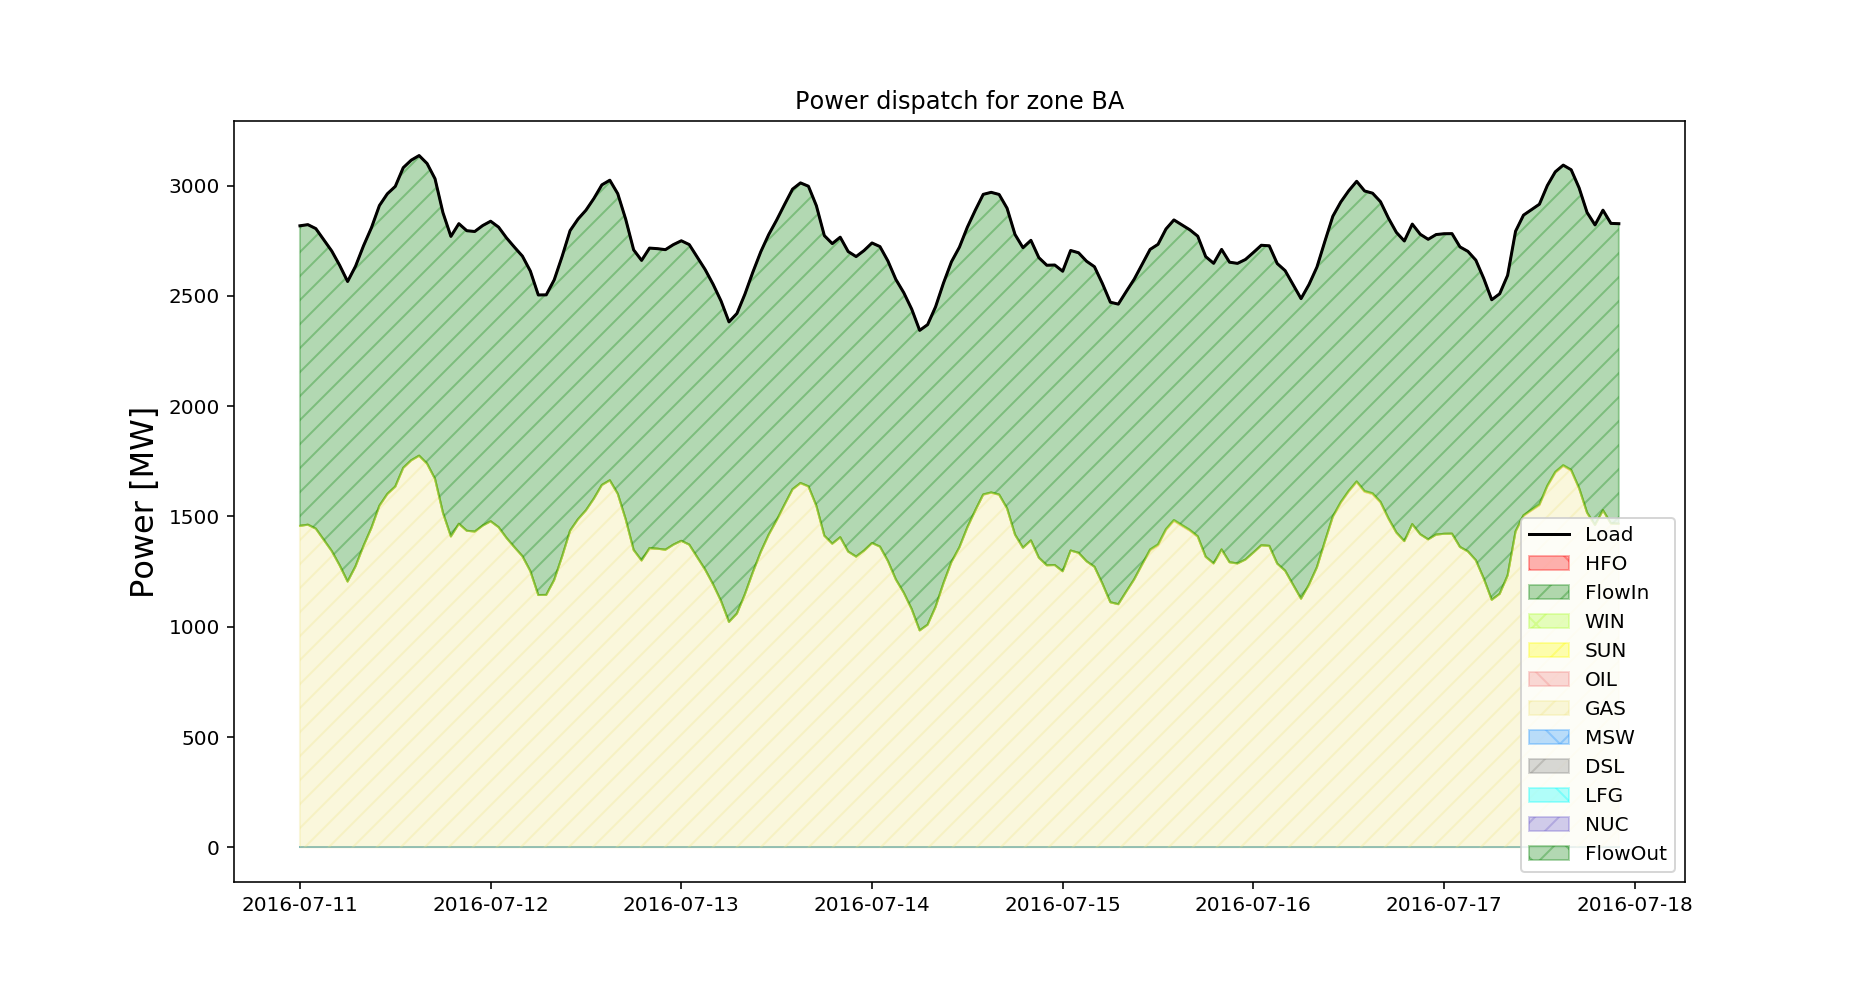

In [23]:
plotdata = post.get_plot_data(inputs, results, 'BA')
demand = post.get_demand(inputs, 'BA')
post.plot_dispatch(demand, plotdata, level=None, rng=rng3)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/BA.png',dpi=300,tight_layout='tight_box')


In [ ]:
plotdata = post.get_plot_data(inputs, results, 'KW')
demand = post.get_demand(inputs, 'KW')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/KW.png',dpi=300,tight_layout='tight_box')


<IPython.core.display.Javascript object>


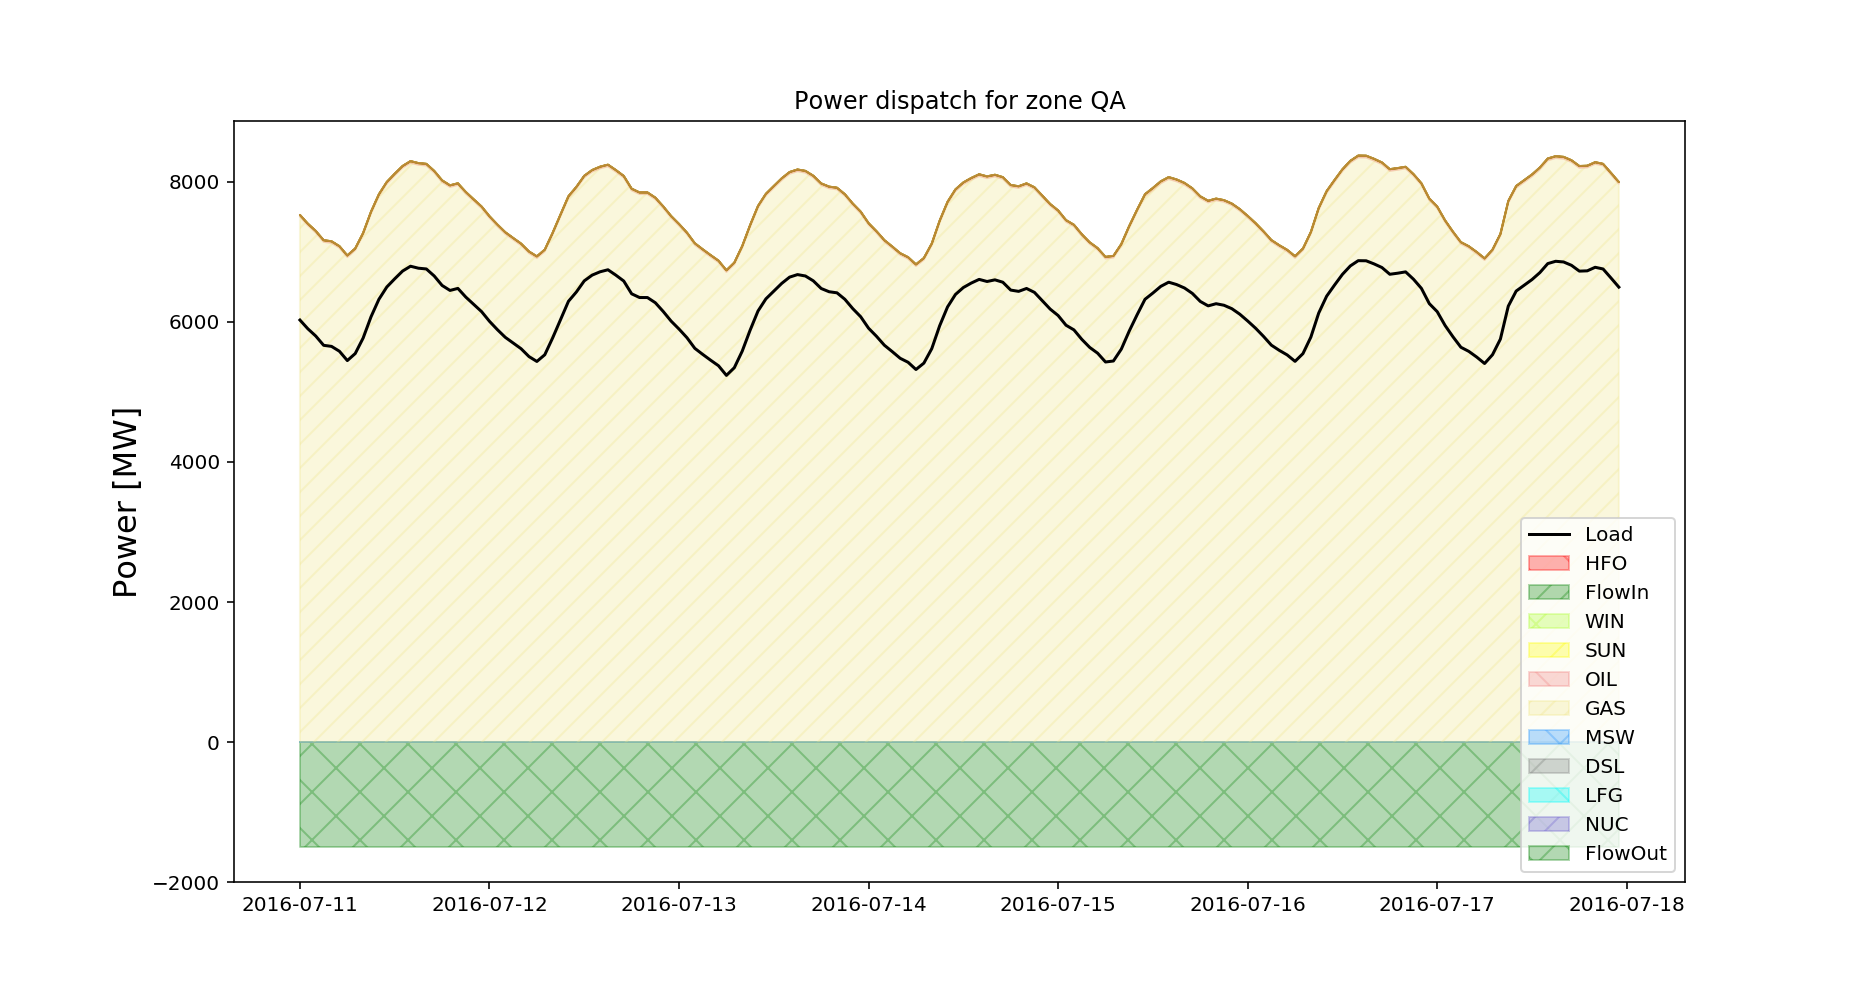

In [24]:
plotdata = post.get_plot_data(inputs, results, 'QA')
demand = post.get_demand(inputs, 'QA')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/QA.png',dpi=300,tight_layout='tight_box')



<IPython.core.display.Javascript object>


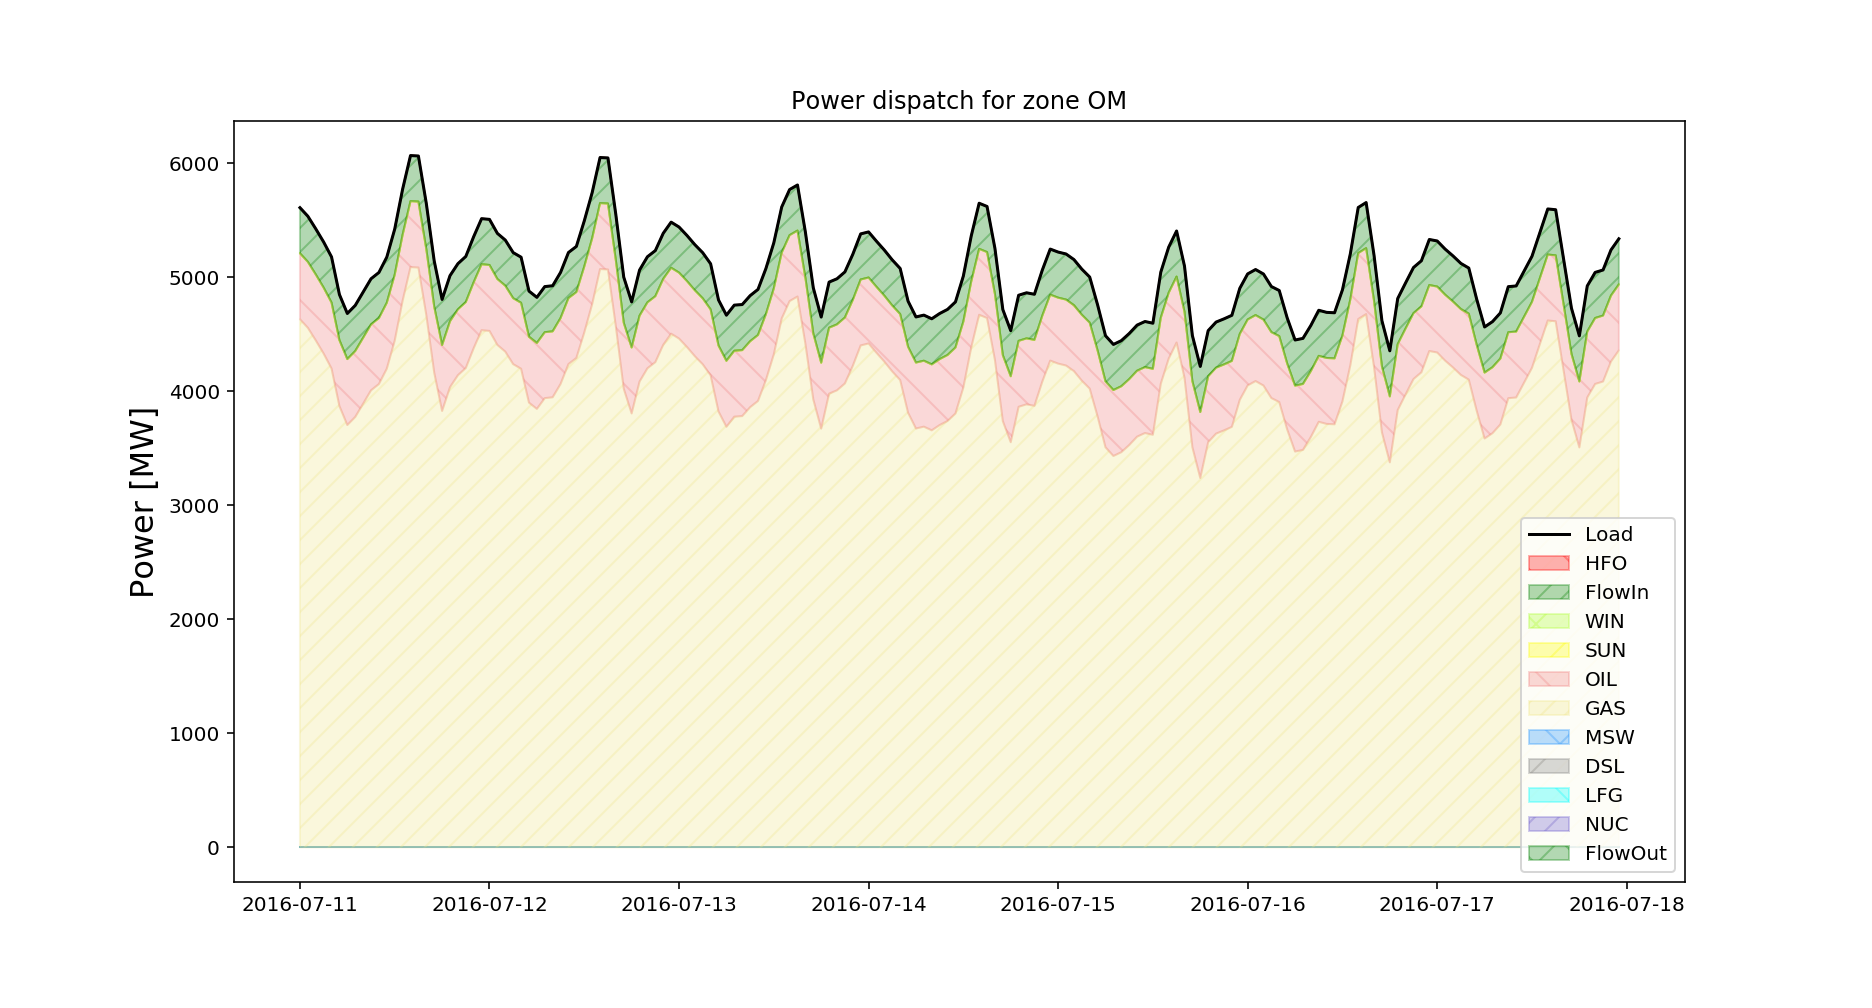

In [26]:
plotdata = post.get_plot_data(inputs, results, 'OM')
demand = post.get_demand(inputs, 'OM')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/OM.png',dpi=300,tight_layout='tight_box')



<IPython.core.display.Javascript object>


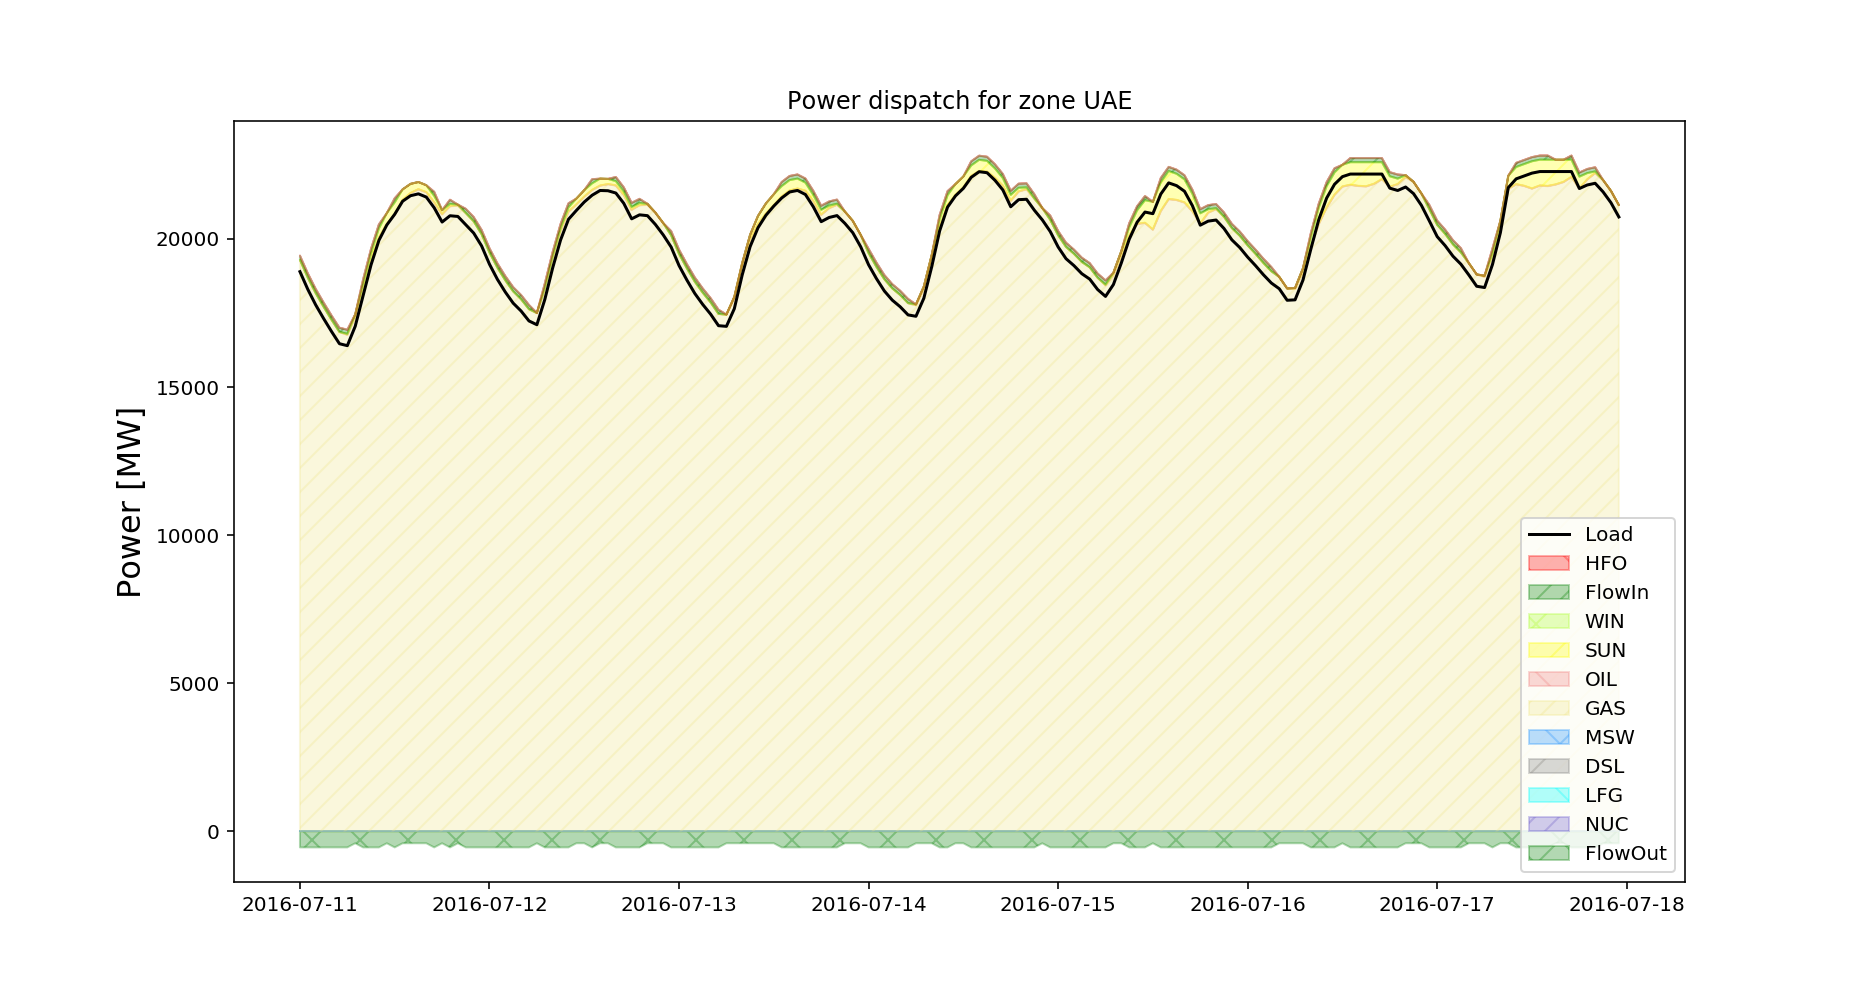

In [25]:
plotdata = post.get_plot_data(inputs, results, 'UAE')
demand = post.get_demand(inputs, 'UAE')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/UAE.png',dpi=300,tight_layout='tight_box')



In [ ]:
results.keys()

# Postprocessing functions 
### Useful to have insights and info about:
## 1- interconnection & entire system
## 2- zones
## 3- single zone
## 4- units

### -- General functions

In [ ]:
inputs.keys()

In [ ]:
datain = ds.ds_to_df(inputs)
datain.keys()

In [ ]:
results.keys()

In [ ]:
#Function that associates each unit to its location from the Dispaset inputs
post.unit_location(inputs)

In [ ]:
#Function that associates each unit to its fuel from the Dispaset inputs
post.unit_fuel(inputs)

## 1- interconnection & entire system

In [ ]:
datain['Demand']['DA'].sum(axis=1).plot()    #Total system demand over time

In [ ]:
datain['Demand']['DA'].sum(axis=1).head(5)    #Total system demand over time

In [ ]:
datain['Demand']['DA'].sum().sum()    #Total system consumption in MWh

In [ ]:
#Reads the DispaSET results and provides useful general information to stdout
r = ds.get_result_analysis(inputs,results)

In [ ]:
#Volume of traded power between countries (sum of output flow)
results['OutputFlow'].sum(axis=1).plot()

In [ ]:
#Volume of traded power between countries (sum of output flow) over time
results['OutputFlow'].sum(axis=1).head(5)

In [ ]:
#Total volume of traded power between each two countries
results['OutputFlow'].sum()

In [ ]:
#Total volume of traded power between countries (sum of output flow) 
results['OutputFlow'].sum().sum()

In [ ]:
#Total output system cost in $ 
results['OutputSystemCost'].sum()  

In [ ]:
results['OutputCurtailedPower'].head(5)    #System curtailed power over time

In [ ]:
results['OutputCurtailedPower'].sum()    #Sum of curtailed power of all countries

In [ ]:
results['ShadowPrice'].sum(axis=1).plot()    #Sum of shadow prices of all countries over time

In [ ]:
results['ShadowPrice'].sum(axis=1).head(5)   #Sum of shadow prices of all countries over time

In [ ]:
results['ShadowPrice'].sum().sum()    #Sum of shadow prices of all countries

In [ ]:
flows = results['OutputFlow']
NetImports = 0
for key in flows:
    if key[:len('RoW')] == 'RoW':
        NetImports -= flows[key].sum()
    elif key[-len('RoW'):] == 'RoW':
        NetImports += flows[key].sum()
NetImports

In [ ]:
inputs['units'].groupby(['Fuel']).sum()['PowerCapacity']

In [ ]:
inputs['units'].groupby(['Technology']).sum()['PowerCapacity']

In [ ]:
#This function sorts the power generation curves of the different units by technology
post.aggregate_by_fuel(results['OutputPower'], inputs, SpecifyFuels=None).head(5)

## 2- zones

In [ ]:
inputs['units'].boxplot(column='Efficiency', by='Zone')

In [ ]:
post.get_sorted_units(inputs, results, zone='All', sortby='CostVariable', ascending=True).boxplot(column='CostVariable', by='Zone')


#### *** Change 'RampUpRate' in the following cell to plot distributions of other units sepcs across different countires
##### 'RampDownRate' & 'Efficiency' & 'MinUpTime' & 'MinDownTime' & 'PartLoadMin' &  'StartUpTime' & 'NoLoadCost' & 'CO2Intensity' 
##### & 'RampingCost'

In [ ]:
UnitsSpec = pd.DataFrame(columns=list(inputs['config']['countries']))
groupedDF = inputs['units'].groupby(['Zone','RampUpRate'])['PowerCapacity'].count()   #sum() for MW and count() for unit numbers
for zone in inputs['config']['countries']:
    tmp = pd.DataFrame()
    tmp1= pd.DataFrame()
    for i in range(len(groupedDF[zone])):
        tmp1 = pd.DataFrame({zone:np.array([groupedDF[zone].index[i]]*int(round(groupedDF[zone].iloc[i])))})
        tmp = pd.concat([tmp,tmp1],axis=0, ignore_index=True)
    UnitsSpec[zone] = tmp[zone]
UnitsSpec.plot.box();


In [ ]:
ax = UnitsSpec.drop(columns=['SA_RIYADH', 'SA_QASSIM', 'SA_HAIL', 'SA_WOA', 'SA_SOA', 'SA_NWOA', 'SA_NEOA','SA_NEOA', 'SA_EOA' ]).plot.box();
ax.set_ylabel("RampRate  (%Capacity/min)")


In [ ]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([UnitsSpec['SA_EOA'], UnitsSpec['SA_RIYADH'], UnitsSpec['SA_QASSIM'], UnitsSpec['SA_HAIL'], UnitsSpec['SA_WOA'], UnitsSpec['SA_SOA'], UnitsSpec['SA_NWOA'], UnitsSpec['SA_NEOA'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(UnitsSpec['SA_EOA'], bins=100)
ax2.margins(x=0.9)

In [ ]:
datain['Demand']['DA'].plot()

In [ ]:
datain['Demand']['DA'].head(5)

In [ ]:
TotalLoadEachCountry = datain['Demand']['DA'].sum()    #total consumption in each country in MWh
TotalLoadEachCountry

In [ ]:
results['OutputFlow'].plot()

In [ ]:
results['OutputFlow'].head(5)

In [ ]:
NewOutputFlow = results['OutputFlow'].copy()
OriginalColumns = []
reverseindex = []
for j,column in enumerate(NewOutputFlow):
    A = column.split(' -> ')
    OriginalColumns.append(A)
    B = list(reversed(A))
    if B in OriginalColumns:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow.iloc[:,D] = NewOutputFlow.iloc[:,D] - NewOutputFlow.iloc[:,j]
NewOutputFlow = NewOutputFlow.drop(NewOutputFlow.columns[reverseindex], axis=1).copy()

NewOutputFlow.head(5)

In [ ]:
ax = NewOutputFlow.plot(kind='line', title=None, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(-0.22, 0.5))
ax.axhline(y=0, xmin=0, xmax=1, color='k', linestyle='--')
ax.yaxis.tick_right()

In [ ]:
columns = []
for i,column in enumerate(NewOutputFlow):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows = NewOutputFlow.drop(NewOutputFlow.columns[columns], axis=1).copy()
ax = GCCFlows.plot(kind='line', title=None, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
ax.axhline(y=0, xmin=0, xmax=1, color='k', linestyle='--')

In [ ]:
results['ShadowPrice'].plot()

In [ ]:
results['ShadowPrice'].drop(columns=[ 'SA_RIYADH','SA_QASSIM', 'SA_HAIL',  'SA_WOA', 'SA_SOA', 'SA_NWOA', 'SA_NEOA','SA_NEOA' ]).plot()


In [ ]:
results['ShadowPrice'].head(5)

In [ ]:
PPindicators = ds.get_indicators_powerplant(inputs,results)

#Plots the generation for each country, disaggregated by fuel type
ax = ds.plot_energy_country_fuel(datain,results,PPindicators)

In [ ]:
# Function that determines generation self sufficiency of each country by computing (local generation - local demand)
post.Local_generation_minus_demand(inputs, results).head(5)

In [ ]:
# Function that computes the generation cost for each zone at each instant of time
# Generation cost includes: CostFixed + CostStartUp + CostShutDown + CostRampUp + CostRampDown + CostVariable
post.get_nodes_generation_cost(inputs, results).head(5)

## 3- single zone

In [ ]:
#This function was explained in (***) above
UnitsSpec = pd.DataFrame(columns=list(inputs['config']['countries']))
groupedDF = inputs['units'].groupby(['Zone','RampUpRate'])['PowerCapacity'].count()   #sum() for MW and count() for unit numbers
for zone in inputs['config']['countries']:
    tmp = pd.DataFrame()
    tmp1= pd.DataFrame()
    for i in range(len(groupedDF[zone])):
        tmp1 = pd.DataFrame({zone:np.array([groupedDF[zone].index[i]]*int(round(groupedDF[zone].iloc[i])))})
        tmp = pd.concat([tmp,tmp1],axis=0, ignore_index=True)
    UnitsSpec[zone] = tmp[zone]
######

plt.figure()
_ = plt.hist(UnitsSpec['SA_EOA'], bins=10, color='Teal')
plt.title('Units Ramp Rates for EOA')
plt.xlabel("RampRate  (%Capacity/min)")
plt.ylabel("Number of Units")

In [ ]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
ax = sns.distplot(UnitsSpec['SA_EOA'], hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});
ax.set_xlabel("RampRate  (%Capacity/min)")

In [ ]:
# set the seaborn style for all the following plots
sns.set_style('white')

ZoneUnitsCapacity=inputs['units']['PowerCapacity'][inputs['units']['Zone']=='SA_EOA']
ZoneUnitsRamprates=inputs['units']['RampUpRate'][inputs['units']['Zone']=='SA_EOA']
sns.jointplot(ZoneUnitsCapacity, ZoneUnitsRamprates, kind='kde', space=0);


In [ ]:
#Get the load curve, the residual load curve, and the net residual load curve of a specific country
#Load:               Load curve of the specified country
#ResidualLoad:       Load minus the production of variable renewable sources
#NetResidualLoad:    Residual netted from the interconnections with neightbouring countries
post.get_load_data(datain,'QA').head(5)

In [ ]:
plotdata = post.get_plot_data(inputs, results, 'QA')
demand = post.get_demand(inputs, 'QA')

#Function that plots the dispatch data and the reservoir level as a cumulative sum
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

In [ ]:
#Get the load curve and the residual load curve of a specific country
post.get_demand(inputs, 'QA').head(5)

In [ ]:
#Generates plots from the dispa-SET results for one spedific country
post.plot_country(inputs, results, c='QA', rng=rng)

In [ ]:
#Function that reads the results dataframe of a DispaSET simulation and extract the dispatch data spedific to one country
plotdata = post.get_plot_data(inputs, results, 'QA')
plotdata.head(5)

In [ ]:
#Function that computes the balance of the imports/exports of a given zone
# (NetImports)
post.get_imports(results['OutputFlow'], 'QA')

In [ ]:
#This function filters the dispaset Output Power dataframe by country
post.filter_by_country(results['OutputPower'], inputs, 'QA').head(5)

## 4- units

<IPython.core.display.Javascript object>


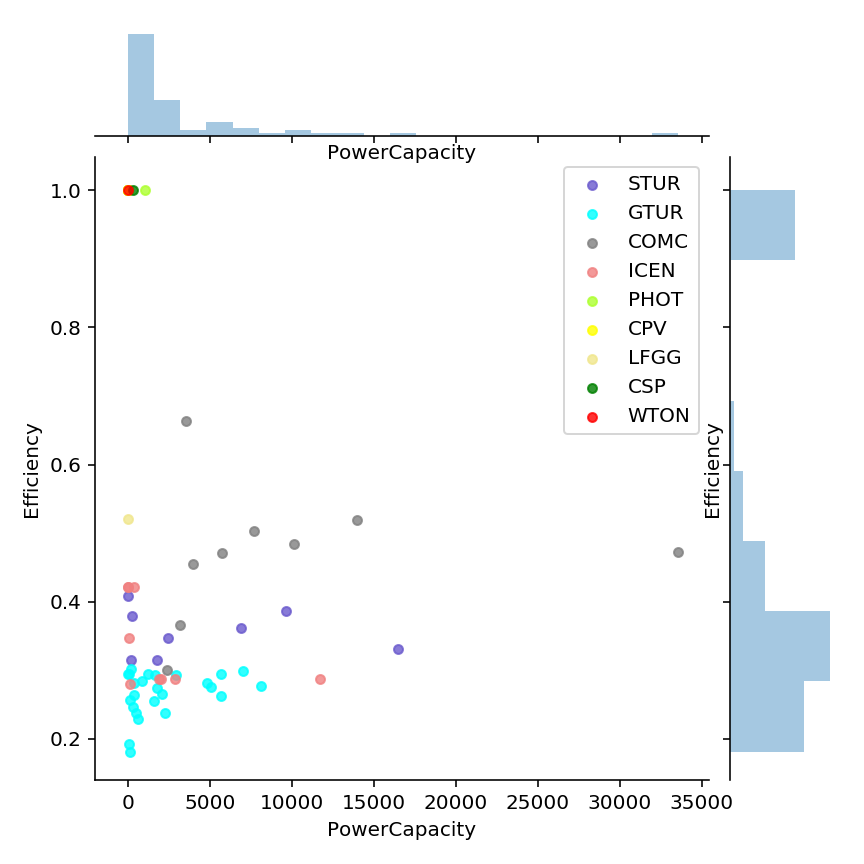

67


/anaconda2/lib/python2.7/site-packages/matplotlib/legend.py:640: UserWarning: Unrecognized location "STUR". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes)))
/anaconda2/lib/python2.7/site-packages/matplotlib/legend.py:640: UserWarning: Unrecognized location "GTUR". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes)))
/anaconda2/lib/python2.7/site-packages/matplotlib/legend.py:640: UserWarning: Unrecognized location "COMC". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes)))
/anaconda2/lib/python2.7/site-packages/matplotlib/legen

In [17]:
#ZoneUnits=inputs['units'][inputs['units']['Zone']=='SA_EOA']
ZoneUnits=inputs['units']

#ZoneUnits=ZoneUnits.ix[ZoneUnits['PowerCapacity'] < 900]
#ZoneUnits=ZoneUnits.ix[ZoneUnits['Zone'] != 'BA']
#ZoneUnits=ZoneUnits.ix[ZoneUnits['Zone'] != 'QA']
#...
COLORS = {'STUR': 'slateblue', 'GTUR': 'aqua', 'COMC': 'grey', 'ICEN': 'lightcoral',
          'MSW': 'dodgerblue', 'CPV': 'yellow', 'WTON': 'red', 'PHOT': 'greenyellow',
          'CSP': 'green', 'LFGG': 'khaki'}

g = sns.JointGrid(x="PowerCapacity", y="Efficiency", data=ZoneUnits);
for tech in ZoneUnits['Technology'].unique():
    tmp = ZoneUnits[ZoneUnits['Technology']==tech]
    tmp_color = COLORS[tech]
    sns.regplot(tmp.PowerCapacity, tmp.Efficiency, color=tmp_color,scatter=True, fit_reg=False, ax=g.ax_joint, scatter_kws={'s':20}, label=tech).legend(loc=tech)
sns.distplot(ZoneUnits.PowerCapacity, kde=False,  ax=g.ax_marg_x)
sns.distplot(ZoneUnits.Efficiency, kde=False,  ax=g.ax_marg_y, vertical=True)

print len(ZoneUnits)
plt.show()

In [ ]:
#ZoneUnits=inputs['units'][inputs['units']['Zone']=='SA_EOA']
ZoneUnits=inputs['units']

#ZoneUnits=ZoneUnits.ix[ZoneUnits['PowerCapacity'] < 900]
#ZoneUnits=ZoneUnits.ix[ZoneUnits['Zone'] != 'BA']
#ZoneUnits=ZoneUnits.ix[ZoneUnits['Zone'] != 'QA']
#...
COLORS = {'NUC': 'slateblue', 'LFG': 'aqua', 'DSL': 'grey', 'GAS': 'lightcoral',
          'OIL': 'dodgerblue', 'SUN': 'yellow', 'HFO': 'red', 'WIN': 'greenyellow',
          'MSW': 'green'}

g = sns.JointGrid(x="PowerCapacity", y="Efficiency", data=ZoneUnits);
for tech in ZoneUnits['Fuel'].unique():
    tmp = ZoneUnits[ZoneUnits['Fuel']==tech]
    tmp_color = COLORS[tech]
    sns.regplot(tmp.PowerCapacity, tmp.Efficiency, color=tmp_color,scatter=True, fit_reg=False, ax=g.ax_joint, scatter_kws={'s':20}, label=tech).legend(loc=tech)
sns.distplot(ZoneUnits.PowerCapacity, kde=False,  ax=g.ax_marg_x)
sns.distplot(ZoneUnits.Efficiency, kde=False,  ax=g.ax_marg_y, vertical=True)

print len(ZoneUnits)
plt.show()

In [ ]:
ZoneUnits=post.get_sorted_units(inputs, results, zone='All', sortby='CostVariable', ascending=True)
#ZoneUnits=ZoneUnits.ix[ZoneUnits['PowerCapacity'] < 900]
#ZoneUnits=ZoneUnits.ix[ZoneUnits['Zone'] != 'BA']
#ZoneUnits=ZoneUnits.ix[ZoneUnits['Zone'] != 'QA']
#...
COLORS = {'STUR': 'slateblue', 'GTUR': 'aqua', 'COMC': 'grey', 'ICEN': 'lightcoral',
          'MSW': 'dodgerblue', 'CPV': 'yellow', 'WTON': 'red', 'PHOT': 'greenyellow',
          'CSP': 'green', 'LFGG': 'khaki'}

g = sns.JointGrid(x="PowerCapacity", y="CostVariable", data=ZoneUnits);
for tech in ZoneUnits['Technology'].unique():
    tmp = ZoneUnits[ZoneUnits['Technology']==tech]
    tmp_color = COLORS[tech]
    sns.regplot(tmp.PowerCapacity, tmp.CostVariable, color=tmp_color,scatter=True, fit_reg=False, ax=g.ax_joint, scatter_kws={'s':20}, label=tech).legend(loc=tech)
sns.distplot(ZoneUnits.PowerCapacity, kde=False,  ax=g.ax_marg_x)
sns.distplot(ZoneUnits.CostVariable, kde=False,  ax=g.ax_marg_y, vertical=True)

print len(ZoneUnits)
plt.show()

In [ ]:
ZoneUnits=post.get_sorted_units(inputs, results, zone='All', sortby='CostVariable', ascending=True)
#ZoneUnits=ZoneUnits.ix[ZoneUnits['PowerCapacity'] < 900]
#ZoneUnits=ZoneUnits.ix[ZoneUnits['Zone'] != 'BA']
#ZoneUnits=ZoneUnits.ix[ZoneUnits['Zone'] != 'QA']
#...
COLORS = {'NUC': 'slateblue', 'LFG': 'aqua', 'DSL': 'grey', 'GAS': 'lightcoral',
          'OIL': 'dodgerblue', 'SUN': 'yellow', 'HFO': 'red', 'WIN': 'greenyellow',
          'MSW': 'green'}

g = sns.JointGrid(x="PowerCapacity", y="CostVariable", data=ZoneUnits);
for tech in ZoneUnits['Fuel'].unique():
    tmp = ZoneUnits[ZoneUnits['Fuel']==tech]
    tmp_color = COLORS[tech]
    sns.regplot(tmp.PowerCapacity, tmp.CostVariable, color=tmp_color,scatter=True, fit_reg=False, ax=g.ax_joint, scatter_kws={'s':20}, label=tech).legend(loc=tech)
sns.distplot(ZoneUnits.PowerCapacity, kde=False,  ax=g.ax_marg_x)
sns.distplot(ZoneUnits.CostVariable, kde=False,  ax=g.ax_marg_y, vertical=True)

print len(ZoneUnits)
plt.show()

#### Change 'RampUpRate' in the following cell to plot distributions of other units sepcs across different countires
##### 'RampDownRate' & 'Efficiency' & 'MinUpTime' & 'MinDownTime' & 'PartLoadMin' &  'StartUpTime' & 'NoLoadCost' & 'CO2Intensity' 
##### & 'RampingCost'

In [ ]:

UnitsSpec = pd.DataFrame(columns=list(inputs['config']['countries']))
groupedDF = inputs['units'].groupby(['Zone','RampUpRate'])['PowerCapacity'].count()   #sum() for MW and count() for unit numbers
for zone in inputs['config']['countries']:
    tmp = pd.DataFrame()
    tmp1= pd.DataFrame()
    for i in range(len(groupedDF[zone])):
        tmp1 = pd.DataFrame({zone:np.array([groupedDF[zone].index[i]]*int(round(groupedDF[zone].iloc[i])))})
        tmp = pd.concat([tmp,tmp1],axis=0, ignore_index=True)
    UnitsSpec[zone] = tmp[zone]

UnitsSpec.drop(columns=['SA_RIYADH', 'SA_QASSIM', 'SA_HAIL', 'SA_WOA', 'SA_SOA', 'SA_NWOA', 'SA_NEOA','SA_NEOA', 'SA_EOA' ]).plot.box();


In [ ]:
#DataFrame with Variable costs for each unit at each time instant
# Warning: This funtion works only with GAMS formulation that has only one variable cost
VariableCost = results['OutputCommitted'].copy()
OperatedUnitList = results['OutputCommitted'].columns
for u in OperatedUnitList:
    unit_indexNo = inputs['units'].index.get_loc(u)
    VariableCost.loc[:,[u]] = np.array(datain['CostVariable'].loc[:,[u]])*np.array(results['OutputPower'][u]).reshape(-1,1)

VariableCost

In [ ]:
# Function that computes the operation cost for each power unit at each instant of time 
# Operation cost includes: CostFixed + CostStartUp + CostShutDown + CostRampUp + CostRampDown + CostVariable
# Warning: This funtion works only with GAMS formulation that has only one variable cost

post.get_units_operation_cost(inputs, results).head(5)

In [ ]:
# Function that sorts power units list based on specific parameter (default is variable cost)
# in case of sorting by variable cost, variable cost is assumed to be fixed by fixing efficiency
# and fuel cost (taken from the first row of each unit's variable cost time series)

post.get_sorted_units(inputs, results, zone='QA', sortby='CostVariable', ascending=True).head(5)

In [ ]:
post.get_sorted_units(inputs, results, zone='All', sortby='CostVariable', ascending=True).boxplot(column='CostVariable', by='Zone')


In [ ]:
#Dictionary
# Function that sorts power units that were committed to a list based on specific parameter (default is variable cost)
# in case of sorting by variable cost, variable cost is assumed to be fixed by fixing efficiency
# and fuel cost (taken from the first row of each unit's variable cost time series)

post.get_committed_sorted_units(inputs, results, sortby='CostVariable', ascending=False)['SA_WOA']

In [ ]:
#Function that analyses the dispa-set results at the power plant level
# Computes the number of startups, the capacity factor, etc

post.get_indicators_powerplant(inputs, results).head(5)

### Reading some new variables added to GAMS code

In [18]:
results['VariableCost']

,"[0L, 1L, 2L, 3L, 4L, ... _EOA - STUR - GAS -","[1003L, 1010L, 1011L, 1012L, 1013L] - UAE - STUR - GAS -","[105L, 106L, 107L, 1 ... _EOA - ICEN - GAS -","[114L, 115L, 116L, 1 ... HAIL - GTUR - OIL -","[126L, 127L, 128L, 1 ... NEOA - GTUR - OIL -","[12L, 13L, 14L, 15L, ... _EOA - GTUR - GAS -","[136L, 137L, 138L, 1 ... NEOA - GTUR - DSL -","[146L, 151L] - SA_NWOA - GTUR - DSL -","[147L, 152L] - SA_NWOA - ICEN - DSL -",[148L] - Dhuba IPP 2 Power Project,[149L] - Duba Gas Turbine Power Plant,"[153L, 154L, 155L, 1 ... SSIM - GTUR - OIL -","[180L, 181L, 182L, 183L, 184L] - SA_QASSIM - GTUR - DSL -","[185L, 186L, 187L, 1 ... YADH - GTUR - GAS -","[193L, 194L, 261L, 2 ... YADH - COMC - GAS -","[195L, 196L, 197L, 1 ... YADH - GTUR - OIL -","[235L, 236L, 237L, 2 ... YADH - COMC - OIL -","[30L, 31L, 32L, 33L, 34L, 35L] - SA_EOA - COMC - GAS -","[375L, 376L, 377L, 3 ... YADH - GTUR - DSL -","[392L, 393L, 394L] - SA_RIYADH - ICEN - GAS -","[399L, 400L, 401L, 4 ... _SOA - GTUR - DSL -","[409L, 410L, 411L, 4 ... _SOA - ICEN - DSL -","[455L, 456L, 457L, 4 ... _SOA - GTUR - OIL -","[489L, 490L, 491L] - SA_SOA - ICEN - GAS -","[493L, 494L, 495L, 4 ... _WOA - STUR - HFO -","[507L, 508L, 509L, 5 ... _WOA - GTUR - OIL -","[517L, 518L, 537L, 538L, 539L] - SA_WOA - COMC - OIL -","[572L, 573L, 574L, 5 ... _WOA - GTUR - DSL -","[58L, 59L, 60L, 61L, 62L, 63L] - SA_EOA - GTUR - DSL -","[642L, 643L, 644L, 645L] - SA_WOA - ICEN - GAS -","[653L, 654L, 655L, 6 ... - BA - COMC - GAS -","[657L, 658L, 659L, 6 ... - BA - GTUR - GAS -","[678L, 679L, 680L, 681L, 682L] - BA - STUR - GAS -","[686L, 687L, 688L, 6 ... - KW - COMC - GAS -","[694L, 701L, 702L, 7 ... - KW - GTUR - GAS -","[707L, 708L, 709L, 7 ... - KW - STUR - OIL -","[759L, 760L, 761L, 762L, 763L, 764L, 765L] - KW - GTUR - OIL -","[769L, 771L, 792L, 7 ... - OM - ICEN - OIL -","[770L, 811L, 812L, 8 ... - OM - COMC - GAS -","[772L, 773L, 774L, 7 ... - OM - GTUR - GAS -","[784L, 785L, 786L, 790L, 791L] - OM - STUR - GAS -","[817L, 818L] - OM - GTUR - OIL -","[899L, 901L, 903L, 9 ... - QA - COMC - GAS -",[900L] - Mesaieed Black Start Power Plant,[902L] - Qatalum IC Power Plant,[910L] - Ras Abu Fontas - B1 Power Plant,"[915L, 916L] - UAE - LFGG - LFG -",[917L] - Abu Dhabi Waste To Energy Demonstration Plant,"[935L, 958L, 987L] - UAE - ICEN - OIL -","[936L, 937L, 938L, 9 ... UAE - GTUR - GAS -","[960L, 961L, 962L, 9 ... UAE - COMC - GAS -",[977L] - Hamriyah Oil Fired Power Plant
1,530056.030117,0.0,0.000000,5220.079413,0.0,0.0,2024.446931,100978.817410,12350.369501,0.000000,37587.057767,4764.017797,0.0,302028.094261,148707.189655,0.0,0.0,244609.014817,0.0,0.0,0.0,0.0,0.0,195225.536236,557552.082208,0.0,0.0,0.0,0.0,280931.026641,4084.886811,0.0,0.0,340700.220847,0.0,0.0,0.0,0.0,142974.935728,0.0,0.0,0.0,254149.071906,0.0,0.0,0.0,24.181154,0.0,0.0,0.0,503600.161251,0.0
2,530056.030117,0.0,0.000000,5220.079413,0.0,0.0,2024.446931,100978.817410,12350.369501,0.000000,37587.057767,4764.017797,0.0,302028.094261,148707.189655,0.0,0.0,244609.014817,0.0,0.0,0.0,0.0,0.0,195225.536236,557552.082208,0.0,0.0,0.0,0.0,280931.026641,4084.886811,0.0,0.0,340700.220847,0.0,0.0,0.0,0.0,142974.935728,0.0,0.0,0.0,254149.071906,0.0,0.0,0.0,24.181154,0.0,0.0,0.0,503600.161251,0.0
3,530056.030117,0.0,0.000000,5220.079413,0.0,0.0,2024.446931,100978.817410,12350.369501,0.000000,37587.057767,4764.017797,0.0,302028.094261,148707.189655,0.0,0.0,244609.014817,0.0,0.0,0.0,0.0,0.0,195225.536236,557552.082208,0.0,0.0,0.0,0.0,280931.026641,4084.886811,0.0,0.0,340700.220847,0.0,0.0,0.0,0.0,142974.935728,0.0,0.0,0.0,254149.071906,0.0,0.0,0.0,24.181154,0.0,0.0,0.0,503598.911617,0.0
4,530056.030117,0.0,0.000000,5220.079413,0.0,0.0,2024.446931,81318.235694,12350.369501,0.000000,37587.057767,4764.017797,0.0,274935.340385,148707.189655,0.0,0.0,244609.014817,0.0,0.0,0.0,0.0,0.0,195225.536236,501770.331074,0.0,0.0,0.0,0.0,280931.026641,4084.886811,0.0,0.0,333121.454925,0.0,0.0,0.0,0.0,140423.039206,0.0,0.0,0.0,252380.778041,0.0,0.0,0.0,24.181154,0.0,

In [ ]:
#DataFrame with Variable costs for each unit at each time instant
# Warning: This funtion works only with GAMS formulation that has only one variable cost
VariableCost = results['OutputCommitted'].copy()
OperatedUnitList = results['OutputCommitted'].columns
for u in OperatedUnitList:
    unit_indexNo = inputs['units'].index.get_loc(u)
    VariableCost.loc[:,[u]] = np.array(datain['CostVariable'].loc[:,[u]])*np.array(results['OutputPower'][u]).reshape(-1,1)

VariableCost

In [ ]:
results['OperationCost']

In [ ]:
# Function that computes the operation cost for each power unit at each instant of time 
# Operation cost includes: CostFixed + CostStartUp + CostShutDown + CostRampUp + CostRampDown + CostVariable
# Warning: This funtion works only with GAMS formulation that has only one variable cost

post.get_units_operation_cost(inputs, results).head(5)

In [ ]:
results['StarUpCost']

In [ ]:
#DataFrame with startup costs for each unit at each time instant
StartUps = results['OutputCommitted'].copy()
for u in StartUps:
    values = StartUps.loc[:, u].values
    diff = -(np.roll(values, 1) - values )#For each unit, this means that :
    diff[diff <= 0] = 0                   #Initial State (before 00:00) == Final State (solved state)
    StartUps[u] = diff

StartUpCost = results['OutputCommitted'].copy()
OperatedUnitList = results['OutputCommitted'].columns
for u in OperatedUnitList:
    unit_indexNo = inputs['units'].index.get_loc(u)
    StartUpCost.loc[:,[u]] = np.array(StartUps.loc[:,[u]])*inputs['parameters']['CostStartUp']['val'][unit_indexNo]

StartUpCost

In [ ]:
#Function that creates multiaxis rug plot from pandas Dataframe
post.plot_rug(results['OutputPower'], on_off=False, cmap='Greys')